In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [28]:
df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')

In [29]:
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
df_sub.head(3)

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016


In [30]:
df.info

<bound method DataFrame.info of             id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_ty

In [31]:
df.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt 

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

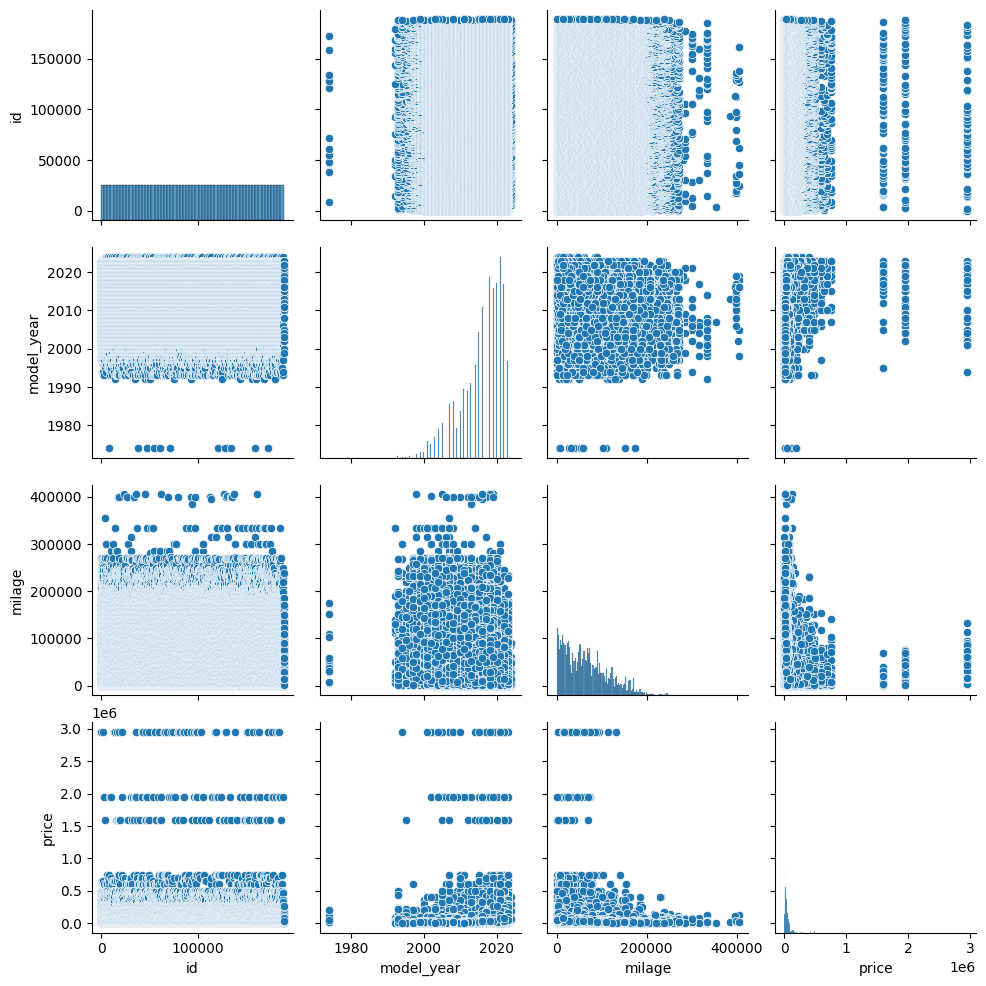

In [33]:
print(df.isnull().sum())

sns.pairplot(df)
plt.show()

**FEATURE ENGINEERING**

In [34]:
# Extracting horsepower from the engine column, only if 'HP' is present
def extract_horsepower(engine_string):
    if 'HP' in engine_string:
        try:
            # Extract the part before 'HP' and convert it to float
            return float(engine_string.split('HP')[0].strip())
        except ValueError:
            return None  # If there's a conversion error, return None or some default value
    else:
        return None  # If 'HP' is not present, return None or some default value

# Apply the function to extract horsepower
df['horsepower'] = df['engine'].apply(extract_horsepower)

# Check if extraction worked correctly
print(df[['engine', 'horsepower']].head())


                                              engine  horsepower
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel       172.0
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel       252.0
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...       320.0
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel       420.0
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel       208.0


In [35]:
from sklearn.preprocessing import LabelEncoder

# Calculating car age
df['car_age'] = 2024 - df['model_year']

# Encoding clean_title as binary (Yes -> 1, No -> 0)
df['clean_title'] = df['clean_title'].map({'Yes': 1, 'No': 0})



# Now encoding categorical columns using LabelEncoder
le = LabelEncoder()

for col in ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident']:
    df[col] = le.fit_transform(df[col])


In [36]:
df.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,car_age
0,0,31,495,2007,213000,2,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,38,312,71,1,1.0,4200,172.0,17


In [37]:
x = df.drop(columns = ['id','price','model_year', 'engine'])
y = df['price']

**MODEL SELECTION**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming X has missing values
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)  # Impute missing values

lr = LinearRegression()
lr.fit(x_imputed, y)

y_pred = lr.predict(x_imputed)

print("Train RMSE:", mean_squared_error(y, y_pred, squared=False))


Train RMSE: 74911.01827005879


In [39]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [44]:
df.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,car_age
0,0,31,495,2007,213000,2,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,38,312,71,1,1.0,4200,172.0,17


In [43]:
df_test.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes


In [52]:
df_test['car_age'] = 2024 - df_test['model_year']

# Encoding clean_title as binary (Yes -> 1, No -> 0)
df_test['clean_title'] = df_test['clean_title'].map({'Yes': 1, 'No': 0})

for col in ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident']:
    df_test[col] = le.fit_transform(df_test[col])

In [53]:
x_test = df_test.drop(columns = ['id','model_year', 'engine'])


In [54]:
x_test.head(1)

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,car_age
0,26,1388,98000,2,16,302,10,1,NaN,9


In [58]:
# Compare columns between training and test data
print("Training columns:", x.columns)
print("Test columns:", x_test.columns)


Training columns: Index(['brand', 'model', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title', 'horsepower', 'car_age'],
      dtype='object')
Test columns: Index(['brand', 'model', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title', 'car_age'],
      dtype='object')


In [60]:
# Add missing columns to X_test if needed and fill with zeros or appropriate values
missing_cols = set(x.columns) - set(x_test.columns)

for col in missing_cols:
    x_test[col] = 0  # You can choose an appropriate value (mean, median, etc.)

# Now ensure the columns are in the same order as in training
x_test = x_test[x.columns]


In [61]:
# Applying the function to extract horsepower in test data 
df_test['horsepower'] = df_test['engine'].apply(extract_horsepower)

# Check if extraction worked correctly
print(df_test[['engine', 'horsepower']].head())


                                              engine  horsepower
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel       240.0
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...       395.0
2                    3.5L V6 24V PDI DOHC Twin Turbo         NaN
3                                     2.0 Liter TFSI         NaN
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel       252.0


In [62]:
# Calculating car age
df_test['car_age'] = 2024 - df_test['model_year']

# Encoding clean_title as binary (Yes -> 1, No -> 0)
df_test['clean_title'] = df_test['clean_title'].map({'Yes': 1, 'No': 0})





for col in ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident']:
    df_test[col] = le.fit_transform(df_test[col])


In [63]:
x_test = df.drop(columns = ['id','price','model_year', 'engine'])

In [71]:
x_test.head(1)

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,car_age
0,31,495,213000,2,38,312,71,1,1.0,172.0,17


In [64]:
imputer = SimpleImputer(strategy='mean')
x_imputed_test = imputer.fit_transform(x)  # Impute missing values

In [66]:
y_pred_test = lr.predict(x_imputed_test)
print("Test RMSE:", mean_squared_error(y_pred,y_pred_test, squared=False))

Test RMSE: 0.0


In [70]:
print(x_imputed_test.shape)  # Shape of the test features
print(y_pred_test.shape)  # Shape of the predictions
print(df_test.shape)  # Shape of the original test dataframe


(188533, 11)
(188533,)
(125690, 14)


In [74]:
# Compare the number of rows
print(df_test.shape)  # Original test dataset shape
print(x_imputed_test.shape)  # Preprocessed test feature shape


(125690, 14)
(188533, 11)


In [75]:
# If necessary, subset X_imputed_test to match the number of rows in df_test
x_imputed_test = x_imputed_test[:df_test.shape[0]]  # Subset the first 125,690 rows

# Now predict again with the corrected number of rows
y_pred_test = lr.predict(x_imputed_test)


**SUBMISSION**

In [76]:
submission = pd.DataFrame({
    'id': df_test['id'],
    'price': y_pred_test
})

submission.to_csv('submission.csv', index=False)
